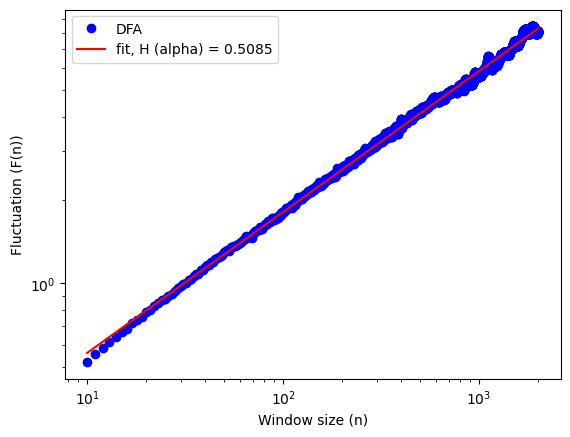

In [7]:
import numpy as np
import fathon
from fathon import fathonUtils as fu
import matplotlib.pyplot as plt

# Time series
a = np.random.randn(10000)

# Zero-mean cumulative sum
a = fu.toAggregated(a)

# Initialize DFA object
pydfa = fathon.DFA(a)

# Compute fluctuation function and Hurst exponent
wins = fu.linRangeByStep(10, 2000)
n, F = pydfa.computeFlucVec(wins, revSeg=True, polOrd=3)
H, H_intercept = pydfa.fitFlucVec()

# Compute Hurst exponent in different ranges
limits_list = np.array([[15, 2000], [200, 1000]], dtype=int)
list_H, list_H_intercept = pydfa.multiFitFlucVec(limits_list)

# Plotting the fluctuation function against window sizes on a log-log scale
plt.figure()
plt.loglog(n, F, 'bo', label='DFA')
# Convert H to a string and add it to the legend
hurst_label = f'fit, H (alpha) = {H:.4f}'
plt.loglog(n, np.exp(H_intercept)*n**H, 'r', label=hurst_label)
plt.xlabel('Window size (n)')
plt.ylabel('Fluctuation (F(n))')
plt.legend()
plt.show()

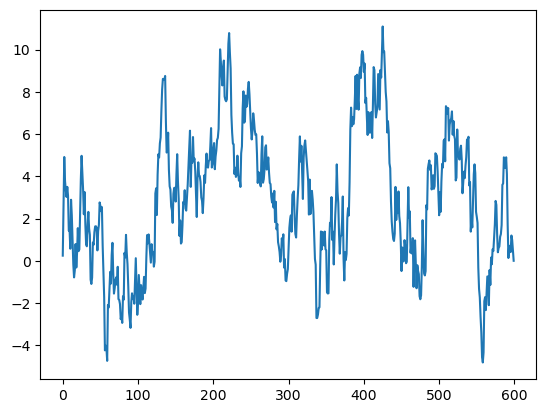

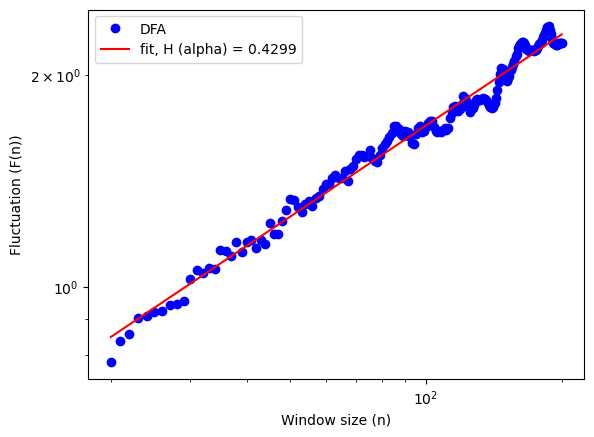

In [63]:
# Time series
a = np.random.randn(600)
# Zero-mean cumulative sum
a = fu.toAggregated(a)

# Initialize DFA object
pydfa = fathon.DFA(a)

# Compute fluctuation function and Hurst exponent
wins = fu.linRangeByStep(20, 200)
n, F = pydfa.computeFlucVec(wins, revSeg=True, polOrd=3)
H, H_intercept = pydfa.fitFlucVec()

plt.figure()
plt.plot(a)

# Plotting the fluctuation function against window sizes on a log-log scale
plt.figure()
plt.loglog(n, F, 'bo', label='DFA')
# Convert H to a string and add it to the legend
hurst_label = f'fit, H (alpha) = {H:.4f}'
plt.loglog(n, np.exp(H_intercept)*n**H, 'r', label=hurst_label)
plt.xlabel('Window size (n)')
plt.ylabel('Fluctuation (F(n))')
plt.legend()
plt.show()

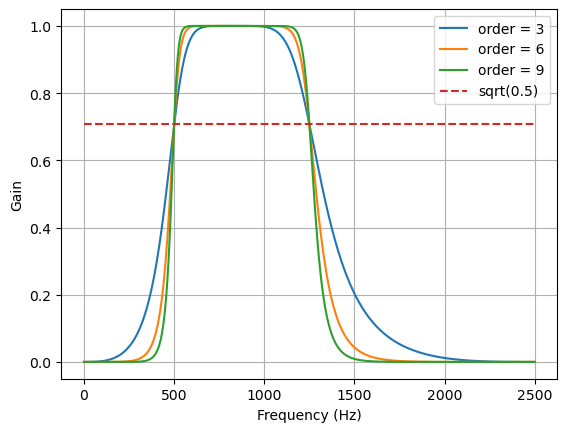

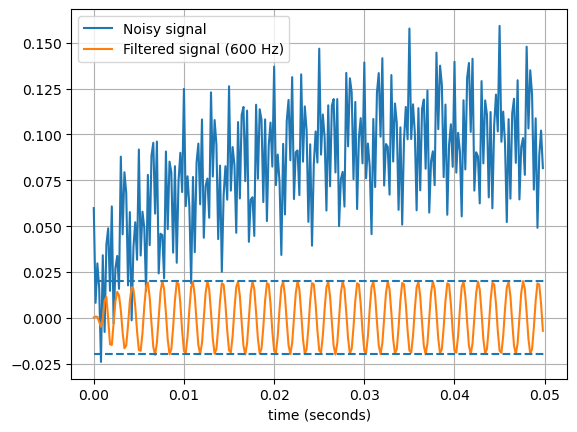

In [64]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, fs=fs, worN=2000)
        plt.plot(w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = T * fs
    t = np.arange(0, nsamples) / fs
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()